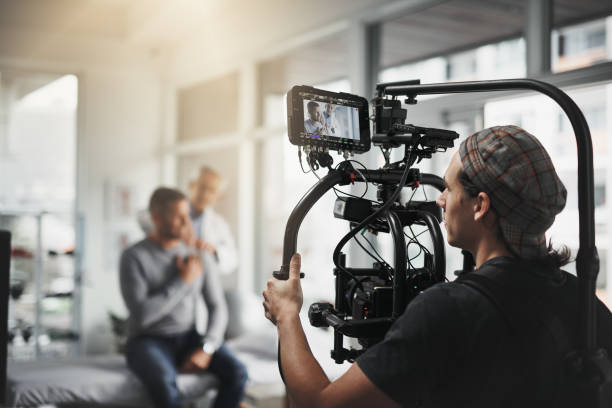

# Microsoft Movie Recommendation Project
## Author : Teofilo Acholla Ligawa Gafna

# Overview

I've been assigned to help Microsoft break into the film business. My objective was to determine what kinds of movies are currently performing the best at the box office and to inform Microsoft's new movie company executives of my results. My investigation of the film industry, which I accomplished by collecting data, using descriptive statistics, and creating visualizations, has demonstrated that a higher budget is associated with a bigger gross revenue return. Going by the findings from the data, a studio is bound to make about 2.4 billion US dollars on an Action/Adventure/Sci-Fi movie released in May, taking into account its production cost, thus the movie studio will likely succeed according to this metric. In terms of number of  viewers, Drama movies are the most wactched according to the study and Documentary movies are the most occuring in the list of top 50 rated movies with a count of 11, follwed closely by Drama with 10 and Action/Adventure/Sci-Fi with 3 counts.

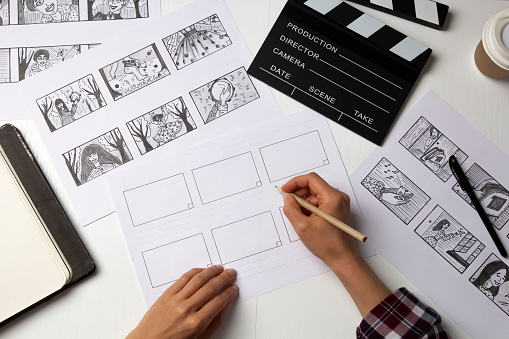

# Business Problem

Microsoft desires to venture into the movie production industry and they have set up a studio. The role that this study has assumed is that of a data scientist who is tasked with shedding light on the movie industry to determine which kind of movies perform best at the box office. The ultimate goal is recommending a movie industry investment strategy to Microsoft.

The anaysis is based upon four main questions:
1. Which genre combination and independent genre is most popular?
2. Which month is lucrative to release the movies?
3. What is the relationship between production budget and revenue earned?
4. How much would you expect to spend on a good movie?

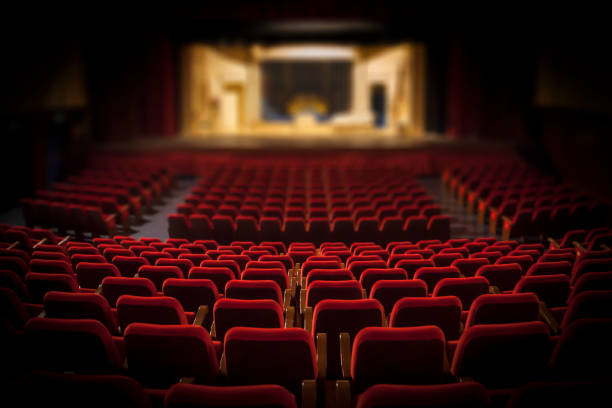

# Data Understanding

The study made use of data from two sources in order to perform an analysis of the movie industry:
1. IMDB: This data source provides access to an IMDB SQL database that the study queried using SQLite in order to obtain movie_basics and movie_ratings. The movie_basics table contained data on movie id, primary title, original title, genre, release year and runtime minutes while the movie_ratings table contained data on movie id, average ratings and number of votes. The study then joined the two tables using the primary key of movie id.
2. TheNumbers: This source provides access to data on movie title, release date, production budget, domestic gross revenue and worldwide gross revenue.

The study first perfomed a merger of movie_basics with movie_ratings then a merger of the first merger with data ffrom TheNumbers.

## Data Preparation

In [81]:
#Installing for colors
! pip install colormap

In [82]:
#loading the necesssary libraries
import pandas as pd
import csv
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import calendar
import os
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.colors import ListedColormap

## IMDB Data

In [2]:
#connecting to the data base
conn = sqlite3.connect('zippedData/im.db')

#creating a cursor object to execute commands
cur = conn.cursor()

In [3]:
# Getting the list of tables in the im.db data base
cur.execute("""
SELECT name
  FROM sqlite_master
 WHERE type = 'table'
""")
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

### movie_basics table

In [4]:
#Accessing the movie_basics table and creating a pandas data frame of data from it
movie_basics_df = pd.read_sql("""
SELECT *
  FROM movie_basics;
""", conn)

#Previewing the data frame, the first five rows of the data frame
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
#The last five rows of the data set
movie_basics_df.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [6]:
#Getting info of the data frame
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [7]:
#Summary descriptive statistics:
movie_basics_df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


### Cleaning the data

In [8]:
#Checking for missing values in each column
movie_basics_df.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [9]:
#checking for dupicates
movie_basics_df.duplicated().sum()

0

In [10]:
#Dealing with missing values
movie_basics_df.dropna(subset = ['genres'], axis = 0, inplace = True)

movie_basics_df.dropna(subset = ['runtime_minutes'], axis = 0, inplace = True)

In [11]:
#Removing columns that the study will not use
movie_basics_df.drop(['original_title'], axis = 1, inplace = True)

In [12]:
#Getting info of the current data frame
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112233 entries, 0 to 146139
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         112233 non-null  object 
 1   primary_title    112233 non-null  object 
 2   start_year       112233 non-null  int64  
 3   runtime_minutes  112233 non-null  float64
 4   genres           112233 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.1+ MB


The data is now clean enough for further processes

### movie_ratings table

In [13]:
#Accessing the movie_ratings table and creating a pandas data frame of data from it
movie_ratings_df = pd.read_sql("""
SELECT *
  FROM movie_ratings;
""",conn)

#Previewing the data frame
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [14]:
#Getting info of the data frame
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [15]:
#Descriptive Statistics
movie_ratings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


### Cleaning the data

In [16]:
#checking for missing values
movie_ratings_df.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [17]:
#checking for duplicates
movie_ratings_df.duplicated().sum()

0

## The Numbers data

In [18]:
# Loading the data
tn_movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

#Previewing the data
tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [19]:
#Getting info on the data
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The **domestic_gross**, **production_budget** and **worldwide_gross** columns are captured as dtype object, which is pandas for string object but we need to use them for visuaizations thus we have to convert them to int or float.

### Feature engineering

In [20]:
#stripping the dollar signs and commas to remove inhibitors of type casting
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].str.strip('$,')
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].str.strip('$,')
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].str.strip('$,')

In [21]:
#replace the punctuation to facilitate type casting into int
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].str.replace(',', '')
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].str.replace(',', '')
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].str.replace(',', '')

In [22]:
#type casting to int
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].map(int)
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].map(int)
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].map(int)

In [23]:
#renaming to capture the unit of currency within the name
tn_movie_budgets_df.rename(columns = {'worldwide_gross':'worldwide_gross_usd',
                                     'production_budget': 'production_budget_usd',
                                     'domestic_gross': 'domestic_gross_usd',
                                     'movie':'title'},
                           inplace = True)

In [24]:
# Descriptive statistics
tn_movie_budgets_df.describe()

,id,production_budget_usd,domestic_gross_usd,worldwide_gross_usd
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [25]:
# Getting info on the data
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     5782 non-null   int64 
 1   release_date           5782 non-null   object
 2   title                  5782 non-null   object
 3   production_budget_usd  5782 non-null   int64 
 4   domestic_gross_usd     5782 non-null   int64 
 5   worldwide_gross_usd    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


Notice how the **domestic_gross**, **production_budget** and **worldwide_gross** columns are captured as dtype int64, which simply put is pandas for int

### Cleaning the data

In [26]:
#Checking for missing values
tn_movie_budgets_df.isna().sum()

id                       0
release_date             0
title                    0
production_budget_usd    0
domestic_gross_usd       0
worldwide_gross_usd      0
dtype: int64

In [27]:
#Checking for dulicates
tn_movie_budgets_df.duplicated().sum()

0

## Combining data
### movie_basics and movie_ratings

In [28]:
# Merging the data frames ince they have a common column, movie_id
# Using 'inner join' to capture common rows only
movie_basics_and_ratings_df = movie_basics_df.merge(movie_ratings_df,
                                                    on ='movie_id', how = 'inner')

#Previewing the data
movie_basics_and_ratings_df.head()

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [29]:
# Getting info of the data
movie_basics_and_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 65719
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   start_year       65720 non-null  int64  
 3   runtime_minutes  65720 non-null  float64
 4   genres           65720 non-null  object 
 5   averagerating    65720 non-null  float64
 6   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.0+ MB


In [30]:
#Descriptive statistics
movie_basics_and_ratings_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,65720.000000,65720.000000,65720.000000,6.572000e+04
mean,2014.258065,94.732273,6.320902,3.954674e+03
std,2.600143,209.377017,1.458878,3.208823e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.200000e+01
75%,2016.000000,104.000000,7.300000,3.520000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [31]:
#changing the column name to facilitate a merger on a common column with tn_movie_budgets
movie_basics_and_ratings_df.rename(columns = {'primary_title':'title'}, inplace = True)

#Previewing the data
movie_basics_and_ratings_df.head()

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [32]:
#Getting info of the data frame
movie_basics_and_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 65719
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   title            65720 non-null  object 
 2   start_year       65720 non-null  int64  
 3   runtime_minutes  65720 non-null  float64
 4   genres           65720 non-null  object 
 5   averagerating    65720 non-null  float64
 6   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.0+ MB


### movie_basics_and_ratings_df and tn_movie_budgets_df

In [33]:
# Merging movie_basics_and_ratings_df and tn_movie_budgets_df
movie_basics_ratings_revenue_df = movie_basics_and_ratings_df.merge(tn_movie_budgets_df,
                                                                    on = 'title', how = 'inner')
#Previewing the data
movie_basics_ratings_revenue_df.head()

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget_usd,domestic_gross_usd,worldwide_gross_usd
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",45000000,0,73706
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",25000000,720828,9313302
2,tt4339118,On the Road,2014,89.0,Drama,6.0,6,17,"Mar 22, 2013",25000000,720828,9313302
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,17,"Mar 22, 2013",25000000,720828,9313302
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",91000000,58236838,187861183


In [34]:
#Getting info on the data
movie_basics_ratings_revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752 entries, 0 to 2751
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movie_id               2752 non-null   object 
 1   title                  2752 non-null   object 
 2   start_year             2752 non-null   int64  
 3   runtime_minutes        2752 non-null   float64
 4   genres                 2752 non-null   object 
 5   averagerating          2752 non-null   float64
 6   numvotes               2752 non-null   int64  
 7   id                     2752 non-null   int64  
 8   release_date           2752 non-null   object 
 9   production_budget_usd  2752 non-null   int64  
 10  domestic_gross_usd     2752 non-null   int64  
 11  worldwide_gross_usd    2752 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 279.5+ KB


In [35]:
# Descriptive Statistics
movie_basics_ratings_revenue_df.describe()

,start_year,runtime_minutes,averagerating,numvotes,id,production_budget_usd,domestic_gross_usd,worldwide_gross_usd
count,2752.000000,2752.000000,2752.000000,2.752000e+03,2752.000000,2.752000e+03,2.752000e+03,2.752000e+03
mean,2013.901526,102.972020,6.243132,6.924085e+04,50.912064,3.473329e+07,4.358103e+07,1.043842e+08
std,2.535127,20.786121,1.168073,1.365289e+05,28.685200,4.822579e+07,7.484907e+07,2.034297e+08
min,2010.000000,3.000000,1.600000,5.000000e+00,1.000000,1.400000e+03,0.000000e+00,0.000000e+00
25%,2012.000000,90.000000,5.600000,2.240000e+02,27.000000,5.000000e+06,5.017520e+05,2.229406e+06
50%,2014.000000,101.000000,6.400000,1.041100e+04,51.000000,1.785000e+07,1.692842e+07,3.007543e+07
75%,2016.000000,113.250000,7.100000,8.028600e+04,76.000000,4.000000e+07,5.245237e+07,1.030832e+08
max,2019.000000,280.000000,9.200000,1.841066e+06,100.000000,4.250000e+08,7.605076e+08,2.776345e+09


### Feature Engineering

In [36]:
#Creating new columns of total_revenue and return on investment

movie_basics_ratings_revenue_df['total_revenue'] = movie_basics_ratings_revenue_df['domestic_gross_usd'] +\
                movie_basics_ratings_revenue_df['worldwide_gross_usd']

movie_basics_ratings_revenue_df['return_on_investment'] = movie_basics_ratings_revenue_df['total_revenue'] - \
                       movie_basics_ratings_revenue_df['production_budget_usd']

In [37]:
# creating a sub set of the data, the top 30 percent of movies according to ratings
top_30_percentile_rating = movie_basics_ratings_revenue_df['averagerating'].quantile(.70) ## = 6.9

top_30th_percentile = movie_basics_ratings_revenue_df.loc[(movie_basics_ratings_revenue_df['averagerating'] > 6.9),
                                                      ['title', 'runtime_minutes', 'genres', 'averagerating','release_date',
                                                      'production_budget_usd', 'domestic_gross_usd', 'worldwide_gross_usd',
                                                      'return_on_investment', 'total_revenue']]

top_30th_percentile = top_30th_percentile.sort_values('averagerating', ascending=False)

#previewing the data
top_30th_percentile.head()

,title,runtime_minutes,genres,averagerating,release_date,production_budget_usd,domestic_gross_usd,worldwide_gross_usd,return_on_investment,total_revenue
1271,Traffic,110.0,Documentary,9.2,"Dec 27, 2000",48000000,124107476,208300000,284407476,332407476
655,The Wall,78.0,Documentary,9.2,"May 12, 2017",3000000,1803064,4495262,3298326,6298326
187,The Runaways,108.0,Adventure,9.2,"Mar 19, 2010",9500000,3573673,5278632,-647695,8852305
1706,Survivor,81.0,"Biography,Crime,Documentary",9.0,"May 29, 2015",20000000,0,1703281,-18296719,1703281
1957,Dragonfly,75.0,"Action,Adventure,Sci-Fi",9.0,"Feb 22, 2002",60000000,30063805,30063805,127610,60127610


In [180]:
top_30th_percentile.describe()

,runtime_minutes,averagerating,production_budget_usd,domestic_gross_usd,worldwide_gross_usd,return_on_investment,total_revenue
count,786.000000,786.000000,7.860000e+02,7.860000e+02,7.860000e+02,7.860000e+02,7.860000e+02
mean,108.726463,7.516158,4.130407e+07,6.579871e+07,1.586742e+08,1.831689e+08,2.244729e+08
std,26.255486,0.456328,5.621804e+07,1.037542e+08,2.706732e+08,3.253856e+08,3.713067e+08
min,5.000000,7.000000,1.500000e+04,0.000000e+00,0.000000e+00,-5.950000e+07,0.000000e+00
25%,93.000000,7.200000,6.500000e+06,2.546747e+06,7.273342e+06,1.926074e+06,1.220904e+07
50%,107.000000,7.400000,1.800000e+07,2.369182e+07,4.606123e+07,4.987474e+07,7.301246e+07
75%,124.000000,7.800000,4.950000e+07,8.146205e+07,1.659000e+08,2.067159e+08,2.542262e+08
max,280.000000,9.200000,3.306000e+08,7.000596e+08,2.048134e+09,2.426950e+09,2.726950e+09


In [168]:
#Middle 50 percent budget range in million US dollars
top_25_percentile_budget = top_30th_percentile['production_budget_usd'].quantile(.75)
top_75_percentile_budget = top_30th_percentile['production_budget_usd'].quantile(.25)
budget_range = (top_75_percentile_budget, top_25_percentile_budget)
budget_range

(6500000.0, 49500000.0)

In [181]:
#creating a column for month
top_30th_percentile['month'] = pd.to_datetime(top_30th_percentile['release_date']).dt.strftime('%B')

#Getting info on the subset
top_30th_percentile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786 entries, 1271 to 2435
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  786 non-null    object 
 1   runtime_minutes        786 non-null    float64
 2   genres                 786 non-null    object 
 3   averagerating          786 non-null    float64
 4   release_date           786 non-null    object 
 5   production_budget_usd  786 non-null    int64  
 6   domestic_gross_usd     786 non-null    int64  
 7   worldwide_gross_usd    786 non-null    int64  
 8   return_on_investment   786 non-null    int64  
 9   total_revenue          786 non-null    int64  
 10  month                  786 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 93.7+ KB


In [182]:
top_30th_percentile.describe()

,runtime_minutes,averagerating,production_budget_usd,domestic_gross_usd,worldwide_gross_usd,return_on_investment,total_revenue
count,786.000000,786.000000,7.860000e+02,7.860000e+02,7.860000e+02,7.860000e+02,7.860000e+02
mean,108.726463,7.516158,4.130407e+07,6.579871e+07,1.586742e+08,1.831689e+08,2.244729e+08
std,26.255486,0.456328,5.621804e+07,1.037542e+08,2.706732e+08,3.253856e+08,3.713067e+08
min,5.000000,7.000000,1.500000e+04,0.000000e+00,0.000000e+00,-5.950000e+07,0.000000e+00
25%,93.000000,7.200000,6.500000e+06,2.546747e+06,7.273342e+06,1.926074e+06,1.220904e+07
50%,107.000000,7.400000,1.800000e+07,2.369182e+07,4.606123e+07,4.987474e+07,7.301246e+07
75%,124.000000,7.800000,4.950000e+07,8.146205e+07,1.659000e+08,2.067159e+08,2.542262e+08
max,280.000000,9.200000,3.306000e+08,7.000596e+08,2.048134e+09,2.426950e+09,2.726950e+09


# Data Analysis

The study employed exploratory analyses based on **genre**, **average_rating**, **month**, **production_budget_usd**, **domestic_gross_usd**, **runtime_minutes** and **worldwide_gross_usd**

### Which genre appears the most overally?

In [103]:
#Getting the top 10 most watched genre combinations
top_10_genres = movie_basics_ratings_revenue_df.genres.value_counts()[:10]
top_10_genres

Drama                         286
Documentary                   118
Comedy                         99
Comedy,Drama                   91
Comedy,Drama,Romance           75
Drama,Romance                  74
Adventure,Animation,Comedy     73
Horror                         59
Action,Adventure,Sci-Fi        58
Comedy,Romance                 58
Name: genres, dtype: int64

In [40]:
plt.style.use('ggplot')

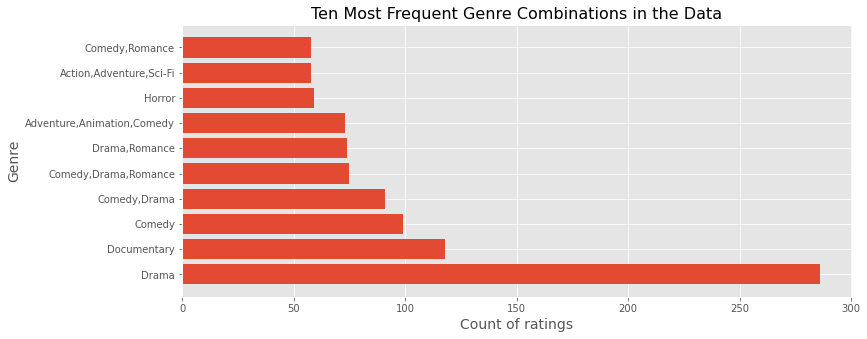

In [41]:
#plotting the top 10 genres in the data set
plt.figure(figsize=(12, 5))
plt.barh(y= top_10_genres.index,
         width= top_10_genres.values)

#labelling the plot
plt.title("Ten Most Frequent Genre Combinations in the Data", fontsize=16)
plt.ylabel("Genre", fontsize=14)
plt.xlabel("Count of ratings", fontsize=14)

plt.show()

Drama was the most common genre, followed by Documentary then Comedy.

### What do you expect to spend on a good movie?

#### What is a good movie?

The study adopted the rationale that a good movie is that which belongs in the top 30 percent, in terms of average rating of the movies in the data.

In [160]:
#what to expect to spend on a good movie and the expexted returns on investment
#This will be the mean of the 'product_budget_usd', 'domestic_gross_usd', 'worldwide_gross_usd', 'total_revenue'

budget = top_30th_percentile.production_budget_usd.mean().round(2)
domestic = top_30th_percentile.domestic_gross_usd.mean().round(2)
worldwide = top_30th_percentile.worldwide_gross_usd.mean().round(2)

#total revenue is the summation of domestic_gross and worldwide_gross
revenue = top_30th_percentile.total_revenue.mean().round(2)

#return on investment is the the budget subtracted from the total_revenue
return_on_inv = top_30th_percentile.return_on_investment.mean().round(2)

print('The mean of the budget is {} million US dollars'.format(budget))
print('The mean of the gross domestic revenue is {} million US dollars'.format(domestic))
print('The mean of the gross worldwide revenue is {} million US dollars'.format(worldwide))
print('The mean of the total revenue is {} million US dollars'.format(revenue))
print('The mean of the return on investment is {} million US dollars'.format(return_on_inv))

The mean of the budget is 41304067.12 million US dollars
The mean of the gross domestic revenue is 65798711.96 million US dollars
The mean of the gross worldwide revenue is 158674207.06 million US dollars
The mean of the total revenue is 224472919.01 million US dollars
The mean of the return on investment is 183168851.89 million US dollars


### Budget recommendation

The study recommends that Microsoft should expect to spend about 41,304,067 million US dollars on a good movie, which is within the top 30 percent budget range of (6,500,000 - 49,500,000) million US dollars computed above.

In [47]:
# The top fifty rated movies in the data
top_50_rated = top_30th_percentile[:50]

#These are the top fifty rated movies from the data
top_50_rated

,title,runtime_minutes,genres,averagerating,release_date,production_budget_usd,domestic_gross_usd,worldwide_gross_usd,return_on_investment,total_revenue,month
1271,Traffic,110.0,Documentary,9.2,"Dec 27, 2000",48000000,124107476,208300000,284407476,332407476,December
655,The Wall,78.0,Documentary,9.2,"May 12, 2017",3000000,1803064,4495262,3298326,6298326,May
187,The Runaways,108.0,Adventure,9.2,"Mar 19, 2010",9500000,3573673,5278632,-647695,8852305,March
1706,Survivor,81.0,"Biography,Crime,Documentary",9.0,"May 29, 2015",20000000,0,1703281,-18296719,1703281,May
1957,Dragonfly,75.0,"Action,Adventure,Sci-Fi",9.0,"Feb 22, 2002",60000000,30063805,30063805,127610,60127610,February
1236,Frankenstein,130.0,Drama,9.0,"Nov 4, 1994",45000000,22006296,112006296,89012592,134012592,November
1415,Dark Blue,85.0,"Crime,Drama",8.9,"Feb 21, 2003",15000000,9237470,12262065,6499535,21499535,February
2508,Bobby,130.0,Drama,8.9,"Nov 17, 2006",14000000,11242801,20597806,17840607,31840607,November
2729,Teeth,71.0,Drama,8.8,"Jan 18, 2008",2000000,347578,2350641,698219,2698219,January
535,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,"Jul 16, 2010",160000000,292576195,835524642,968100837,1128100837,July


In [48]:
# Getting info on the top fifty rated movies
top_50_rated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1271 to 1225
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  50 non-null     object 
 1   runtime_minutes        50 non-null     float64
 2   genres                 50 non-null     object 
 3   averagerating          50 non-null     float64
 4   release_date           50 non-null     object 
 5   production_budget_usd  50 non-null     int64  
 6   domestic_gross_usd     50 non-null     int64  
 7   worldwide_gross_usd    50 non-null     int64  
 8   return_on_investment   50 non-null     int64  
 9   total_revenue          50 non-null     int64  
 10  month                  50 non-null     object 
dtypes: float64(2), int64(5), object(4)
memory usage: 4.7+ KB


## Which genres should Microsoft Produce?

In [50]:
top_50_rated.genres.value_counts()

Documentary                        11
Drama                              10
Action,Adventure,Sci-Fi             3
Comedy,Romance                      2
Comedy,Drama                        2
Drama,Romance,Thriller              2
Drama,Mystery,Thriller              2
Drama,Music                         2
Drama,History,War                   1
Crime,Drama                         1
Adventure                           1
Comedy                              1
Action,Thriller                     1
Adventure,Biography,Documentary     1
Action,Biography,Drama              1
Action,Sport                        1
Adventure,Drama,Sci-Fi              1
Drama,Music,Musical                 1
Biography,Crime,Documentary         1
Drama,Western                       1
Action,Documentary,Drama            1
Drama,Thriller                      1
Comedy,Drama,Music                  1
Documentary,Music                   1
Name: genres, dtype: int64

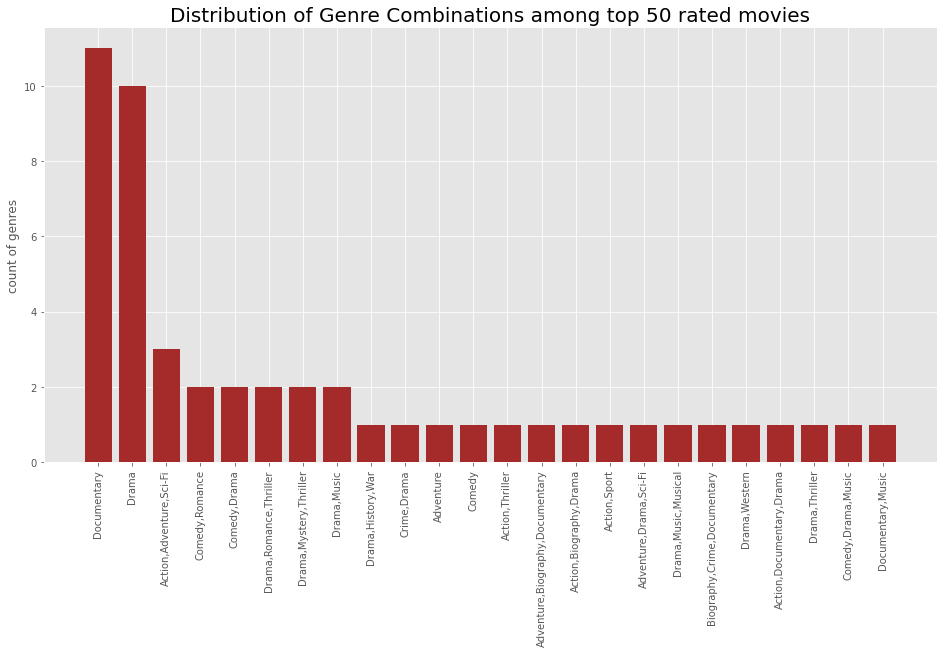

In [49]:
#Plotting the graphics of the top fifty rated movies
genre_counts = top_50_rated.genres[:50].value_counts()

#ploting the distribution of genre among the top thirty-rated movies
fig,ax = plt.subplots(figsize=(16,8))

plt.style.use('ggplot')
x=genre_counts.index
y=genre_counts.values
ax.bar(x,y ,color='brown')

#labels
ax.set_title('Distribution of Genre Combinations among top 50 rated movies', fontsize = 20)
ax.set_ylabel('count of genres')
ax.tick_params(axis="x", labelrotation=90)

Among the top 50 rated movies, Documentary leads with 11 entries, Drama follows closely with 10 entries but seems to make several appearances with other genres among the top 50 list. Action/Adventure/Sci-Fi follows Drama with three entries. Other notable mentions include Thriller, Comedy and Crime.

### What about independent Genres?

The study tried to split the genre combinations into specific genres to determine which specific genre dominates the top 50.

In [99]:
#splitting genre combinations to independent genres

splitted = movie_basics_ratings_revenue_df['genres'].str.split(',')
l = splitted.str.len()

x = movie_basics_ratings_revenue_df['averagerating']

#is necessary define new column name (rating) and change `df[]` to `x`  
#This is a data frame of genre and average rating only
df = pd.DataFrame({'average_rating': np.repeat(x, l), 'genres':np.concatenate(splitted)})

#the top rated movies
df = df.loc[(df['average_rating'] > 7.5), ['average_rating', 'genres']]
df

#sorting the values in terms of rating
top_independent_genres = pd.DataFrame(df.sort_values('average_rating', ascending=False))

#getting the counts of the various genres
top_independent_genres[:50]

,average_rating,genres
1271,9.2,Documentary
655,9.2,Documentary
187,9.2,Adventure
1706,9.0,Documentary
1236,9.0,Drama
1706,9.0,Biography
1957,9.0,Adventure
1957,9.0,Sci-Fi
1706,9.0,Crime
1957,9.0,Action


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Documentary'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Drama'),
  Text(3, 0, 'Biography'),
  Text(4, 0, 'Sci-Fi'),
  Text(5, 0, 'Crime'),
  Text(6, 0, 'Action'),
  Text(7, 0, 'Comedy'),
  Text(8, 0, 'History'),
  Text(9, 0, 'War'),
  Text(10, 0, 'Music'),
  Text(11, 0, 'Thriller')])

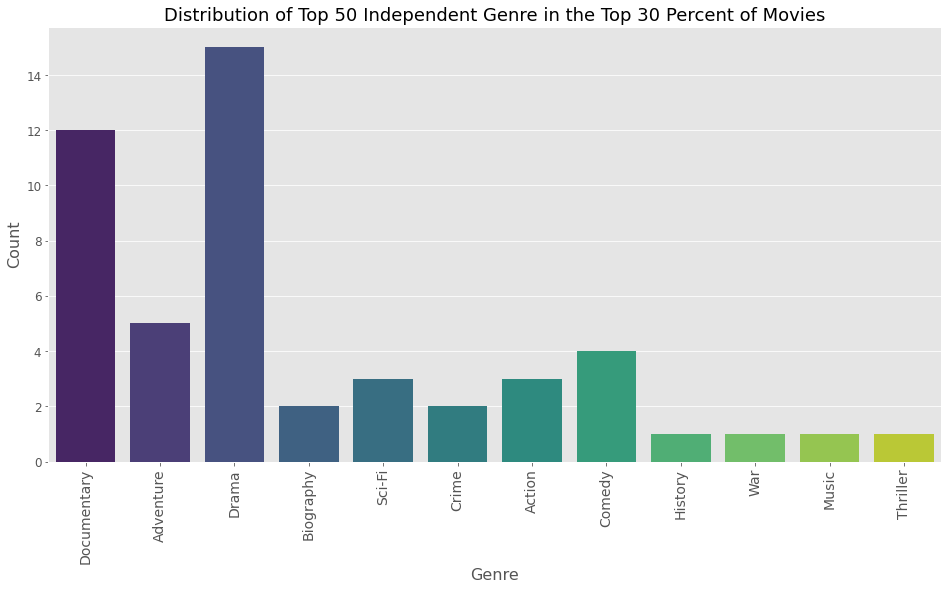

In [101]:
#plotting independent genre counts
plt.figure(figsize=(16,8))

sns.countplot(x = 'genres',
            data = top_independent_genres[:50],
             palette='viridis')
#Labelling the plot
plt.title('Distribution of Top 50 Independent Genre in the Top 30 Percent of Movies', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=90)

The result is consistent with that of the genre combinations. Drama overtakes Documentary because it seemingly made more appearances in terms of combinations with other genre. Thus according to the data, the dominating genre in the top fifty movies is Drama with Adventure, Action, Sci-Fi and comedy consistently appearing.

In [169]:
#Getting average rating of each genre in the top 30th percentile
# Grouping by genres to get mean rating for each genre combinations
genre_average = top_30th_percentile.groupby('genres')['averagerating'].mean()
genre_average = genre_average.sort_values(ascending = False)

#The top 30 genre combinations in the top 30th percentile
genre_average[:30]

genres
Biography,Crime,Documentary    9.000000
Action,Documentary,Drama       8.700000
Documentary,Music              8.500000
Adventure                      8.433333
Action,Sport                   8.400000
Drama,Music,Musical            8.400000
Drama,Romance,Thriller         8.400000
Drama,Western                  8.400000
Drama,Mystery,War              8.300000
Adventure,Drama,Sci-Fi         8.300000
Crime,Documentary              8.250000
Drama,Music                    8.200000
Action,Drama                   8.200000
Crime,Horror,Thriller          8.200000
Crime,Documentary,History      8.200000
Mystery,Thriller               8.100000
Documentary,Drama,History      8.100000
Mystery                        8.100000
Action,Adventure,Mystery       8.000000
Action,Comedy,Drama            8.000000
Comedy                         7.933333
Action,Sci-Fi                  7.900000
Drama,Musical                  7.900000
Comedy,Mystery,Thriller        7.900000
Sport                          7.

The genre combination with the highest mean rating is Biography,Crime,Documentary. It does not come as a surprise to see Documentary up there, followed by Action,Documentary, Drama with Drama, Sci-Fi and Adventure making a couple of appearances.
Below is a plot to show this distribution.

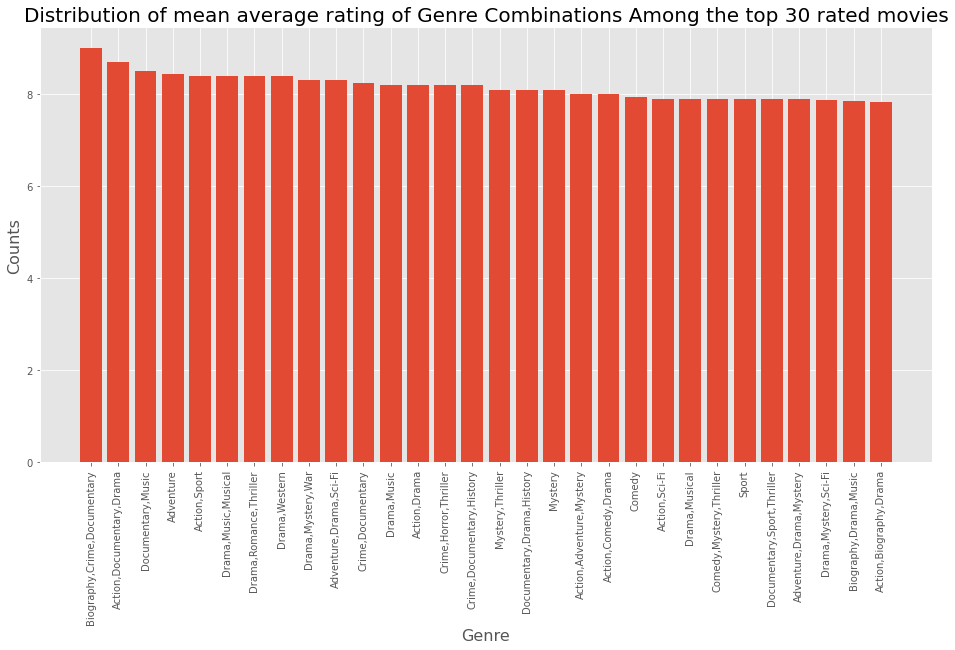

In [123]:
#Plotting average ratings per genre combinations in the top 30th percentile
fig, ax = plt.subplots(figsize=(16,8))

x = genre_average[:30].index
y = genre_average[:30].values

#labels
ax.bar(x,y)
ax.set_title('Distribution of mean average rating of Genre Combinations Among the top 30 rated movies', fontsize = 20)
ax.set_ylabel('Counts', fontsize = 16)
ax.set_xlabel('Genre', fontsize = 16)
ax.tick_params(axis="x", labelrotation = 90)

## Distribution of total revenue, return on Investment and Production Budget by Genre

In [178]:
#Revenue yielded by various genre combinations in billions of US dollars
genre_rev = top_30th_percentile.groupby('genres')['total_revenue'].mean()
genre_rev = genre_rev.sort_values(ascending = False)
genre_rev[:50]

genres
Action,Adventure,Thriller        1.414887e+09
Family,Fantasy,Musical           1.373851e+09
Family                           1.210698e+09
Adventure,Fantasy                1.209716e+09
Adventure,Family,Fantasy         1.178224e+09
Action,Adventure,Sci-Fi          1.128521e+09
Action,Adventure,Family          9.999441e+08
Action,Adventure,Fantasy         9.723952e+08
Adventure,Drama,Sci-Fi           8.690512e+08
Action,Thriller                  8.538775e+08
Action,Adventure,Comedy          8.485170e+08
Adventure,Animation,Comedy       8.095586e+08
Action,Adventure,Drama           7.778313e+08
Action,Adventure,Horror          7.338744e+08
Action,Adventure,Crime           7.225119e+08
Horror,Thriller                  7.210231e+08
Action,Crime,Thriller            6.846147e+08
Biography,Drama,Music            6.386371e+08
Action,Adventure,Animation       6.142628e+08
Drama,Western                    6.127538e+08
Biography,Documentary,History    6.109293e+08
Animation,Comedy,Family    

Action, Adventure, Thriller yields the most revenue. It is followed by Family, Fantasy, Musical with Action, Adventure making a lot of appearances

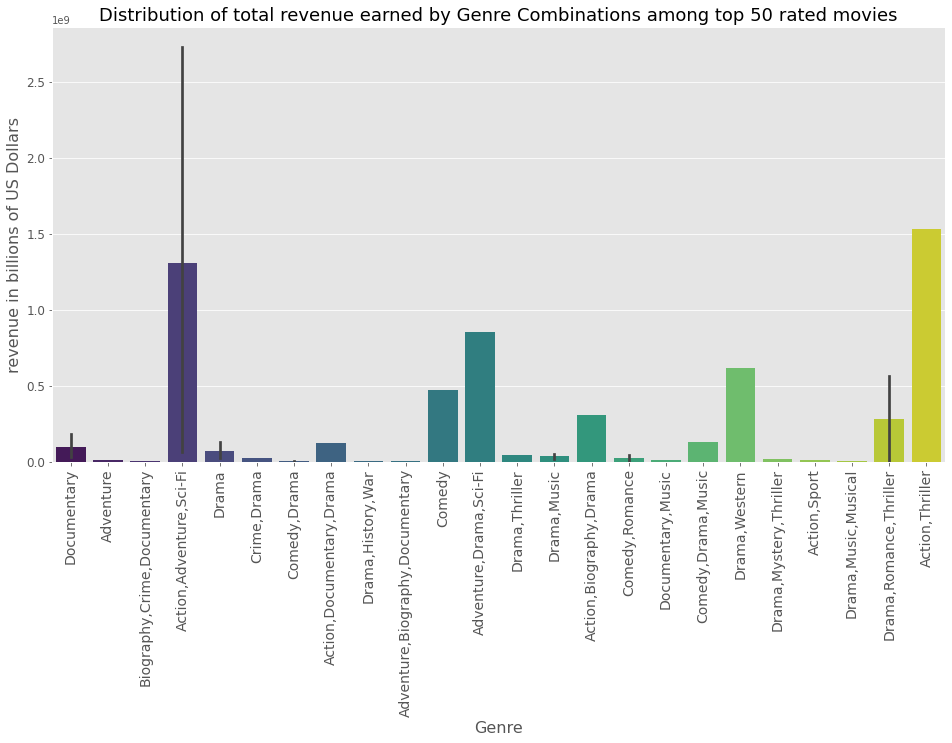

In [172]:
#plotting total revenue and genre combinations

plt.figure(figsize=(16,8))
sns.barplot(x='genres',
            y ='total_revenue',
            data = top_50_rated, 
            palette='viridis')

#Labelling the plot
plt.title('Distribution of total revenue earned by Genre Combinations among top 50 rated movies', fontsize=18)
plt.ylabel('revenue in billions of US Dollars', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=90);

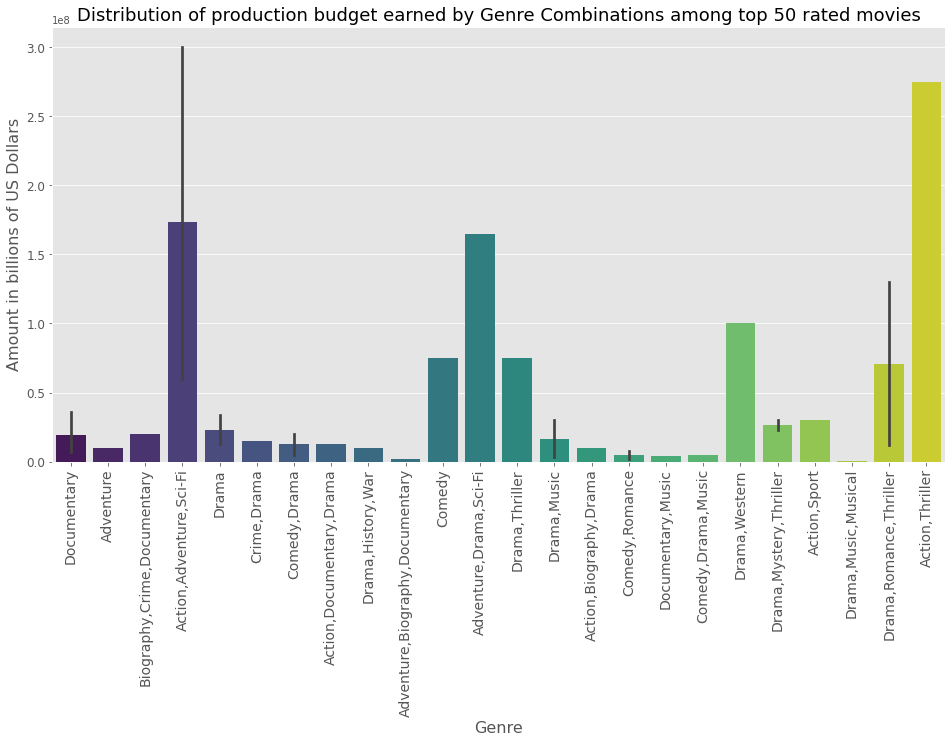

In [171]:
#plotting genre against production budget
plt.figure(figsize=(16,8))
sns.barplot(x='genres',
            y ='production_budget_usd',
            data = top_50_rated, 
            palette='viridis')

#Labelling the plot
plt.title('Distribution of production budget earned by Genre Combinations among top 50 rated movies', fontsize=18)
plt.ylabel('Amount in billions of US Dollars', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=90);

Action, Adventure, Sci-Fi is the most expensive movie to produce followed by Action, Thriller then Adventure, Drama, Sci-Fi

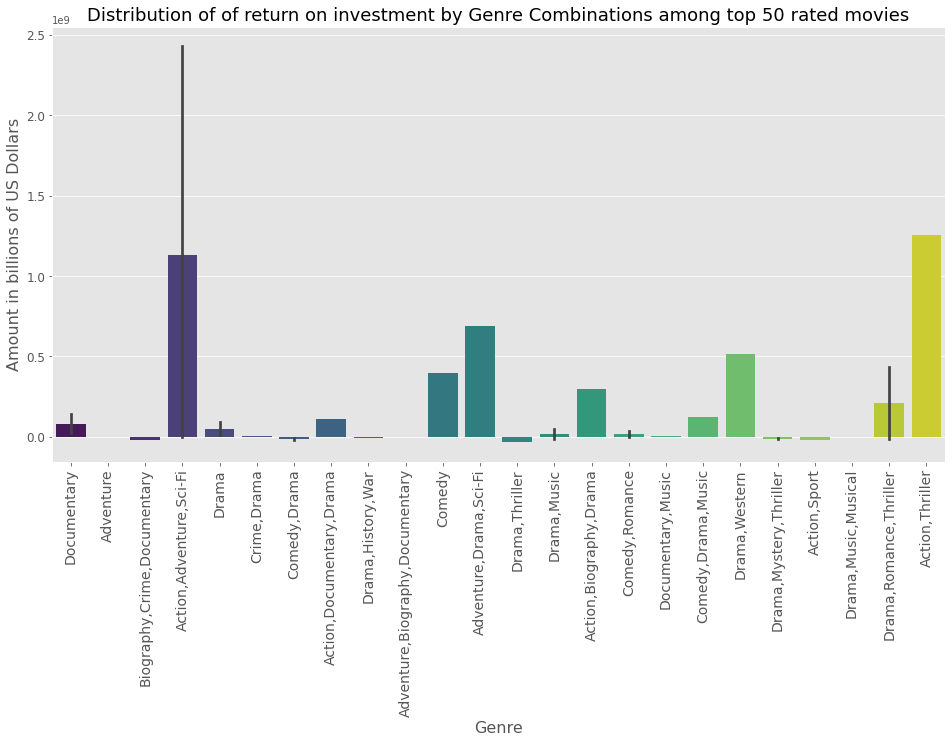

In [170]:
#plot of return on investment by Genre
plt.figure(figsize=(16,8))
sns.barplot(x='genres',
            y ='return_on_investment',
            data = top_50_rated, 
            palette='viridis')

#Labelling the plot
plt.title('Distribution of of return on investment by Genre Combinations among top 50 rated movies', fontsize=18)
plt.ylabel('Amount in billions of US Dollars', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=90);

It is not surprising to see Action, Adventure, Sci-Fi followed by Action, Thriller leading the charts. Followed by Adventure, Drama, Sci-Fi

## Genre recommendation

The study recommends that based on rating, Microsoft should invest in:
1. Documentary
2. Drama
3. Action


The study further recommends that based on return on investment, Microsoft should invest in:
1. Action
2. Adventure
3. Sci-Fi


## When is it Lucrative to release the movie?
### Distribution of Revenue by Month

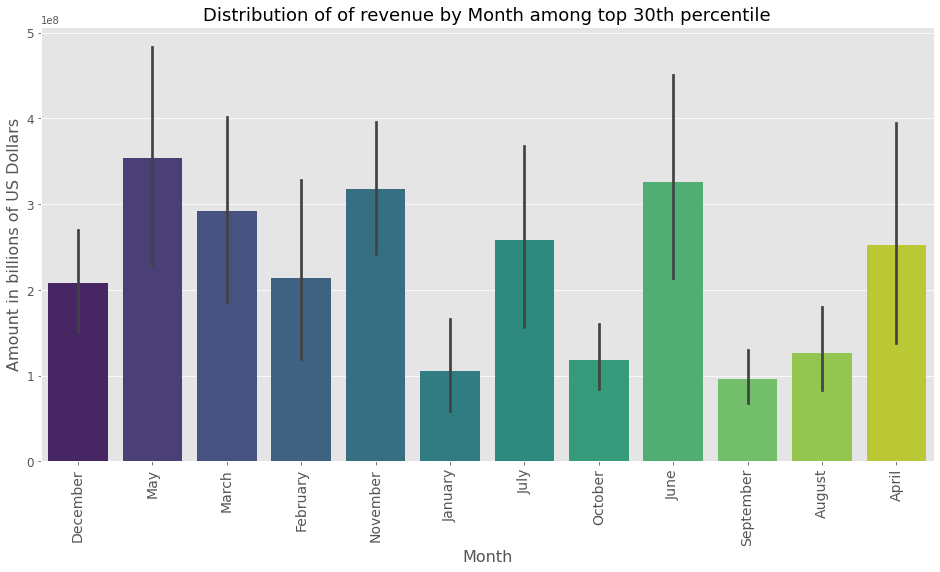

In [179]:
#plot of genres by months of the year
plt.figure(figsize=(16,8))
sns.barplot(x='month',
            y ='total_revenue',
            data = top_30th_percentile, 
            palette='viridis')

#Labelling the plot
plt.title('Distribution of of revenue by Month among top 30th percentile', fontsize=18)
plt.ylabel('Amount in billions of US Dollars', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=90);

### Month recommendation

According to the data, the lucrative months are the months between are April, May, June and July then the months between November, December, February and March.

Upon consideration of the prior recommendations, the study recommends that Microsoft should:
1. Release either of, or a combination of Drama, Documentary or Action between April and July or between November and March.
2. Release either of, or a combination of Action, Adventure, Sci-Fi between April and July or between November and March.
3. To earn a significant amount of revenue while having movies that are relatively highly rated , Microsoft should produce an Action/Adventure/Sci-Fi movie on an estimated budget of around 49 million US dollars and release it in May.

## The Relationship between production budget and Total revenue in the top 30 Percent rated movies

In [150]:
budget_rev_corr_30th = top_30th_percentile['production_budget_usd'].corr(top_30th_percentile['total_revenue'])
budget_rev_corr_30th

0.8420325252958758

As shown above, there exists a strong positive correlation between production budget and total revenue among the top 30th percentile of rated movies. This implies that when production budget increases, there wil be a strong and positive increment in the total revenue. The relationship has been visualized below.

Text(0, 0.5, 'total revenue in Billions of US Dollars')

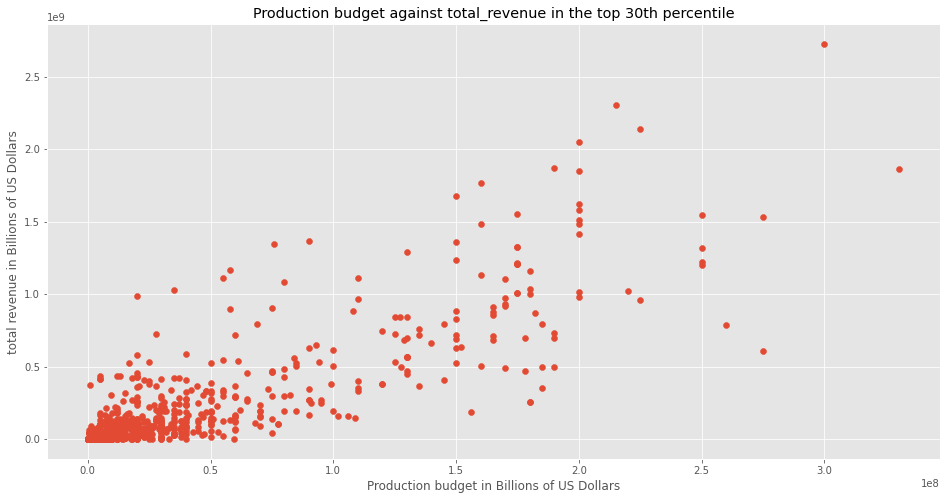

In [151]:
fig, ax = plt.subplots(figsize=(16,8))

#Plot
x = top_30th_percentile['production_budget_usd']
y = top_30th_percentile['total_revenue']

#labels
ax.scatter(x,y)
ax.set_title('Production budget against total_revenue in the top 30th percentile')
ax.set_xlabel('Production budget in Billions of US Dollars')
ax.set_ylabel('total revenue in Billions of US Dollars')

## The relationship between average rating and runtime minutes in the top 30 percent rated movies

In [152]:
#correlation between runtime_minutes and averagerating
rating_mins_corr = top_30th_percentile['averagerating'].corr(top_30th_percentile['runtime_minutes'])
rating_mins_corr

0.01365991374439056

There exists a weak positive relationship between runtime minutes and average rating. Thus the study considers this value as negligible and assumes that average rating is not affected by runtime minutes as shown below.

Text(0, 0.5, 'runtime minutes')

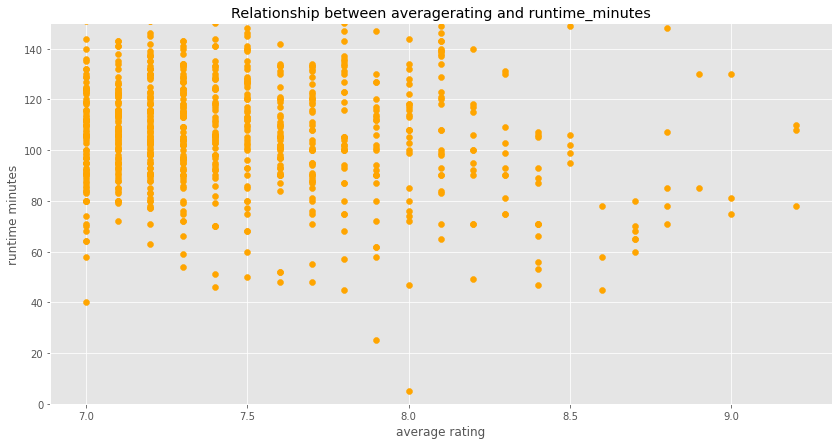

In [156]:
fig,ax = plt.subplots(figsize=(14,7))
plt.style.use('ggplot')
x=top_30th_percentile['averagerating']
y=top_30th_percentile['runtime_minutes']
ax.set_ylim(0,150)

ax.scatter(x,y ,color='orange')

#labels
ax.set_title('Relationship between averagerating and runtime_minutes')
ax.set_xlabel('average rating')
ax.set_ylabel('runtime minutes')

In [155]:
# correlation between runtime minutes and return on investment
rev_mins_corr = top_30th_percentile['return_on_investment'].corr(top_30th_percentile['runtime_minutes'])
rev_mins_corr

0.2085921945324653

There exists a weak positive correlation between runtime minutes and return on investment, thus the study assumes that runtime minutes does not have a significant impact on return on investment. The relationship is shown below.

Text(0, 0.5, 'runtime minutes')

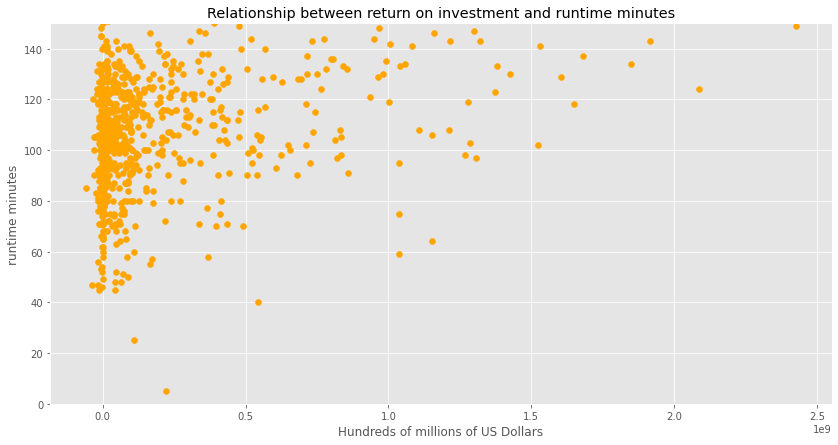

In [157]:
fig,ax = plt.subplots(figsize=(14,7))
plt.style.use('ggplot')
x=top_30th_percentile['return_on_investment']
y=top_30th_percentile['runtime_minutes']
ax.set_ylim(0,150)

ax.scatter(x,y ,color='orange')
ax.set_title('Relationship between return on investment and runtime minutes')
ax.set_xlabel('Hundreds of millions of US Dollars')
ax.set_ylabel('runtime minutes')

# Evaluation

Microsoft's ticket to worldwide film industry success lies in producing an Action/Adventure/Sci-Fi movie on an estimated budget of around 1.1 billion US dollars released in May if they are to get a significant value for their studio investment, or produce either of or a combination of Documentary/Drama/Action and release it between April and July or between November and March if they want to create a good reputation for themselves in the film industry.

I am convinced that Microsoft will have a successful entry into the filmmaking sector if the suggestions the study has offered are implemented. The data shows that every characteristic the study has mentioned is associated with a big global box office take, which is exactly what Microsoft will want for their initial films and beyond.

## Conclusion

From the evaluation above, I would recommend that Microsoft take the following approach:

### Short-term Strategy

In the short term, the study recommends that Microsoft should focus on making a name for themselves in the short run and thus produce a Documentary/Drama/Action movie to be released between April and July or between November and March on a budget of around 41 million US dollars that will increase the probability of obtaining ratings of 8.2 and above. This will most likely cause them to gain popularity.

### Long-term Strategy

In the long term the study recommends that Microsoft should focus on getting value for their money and produce an Action/Adventure/Sci-Fi movie that is produced on a budget of around 49 million US dollars. They should do this along with producing Drama/Documentary/Action in order to rise high in the charts of movie studios.

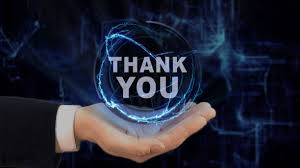